In [1]:
import pandas as pd

In [12]:
data = pd.read_csv('Telco_customer_churn_data1.csv')

In [13]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
miss_values = data.isnull().sum()
miss_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [46]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())
data = data.dropna(subset=['Churn'])

In [18]:
!pip install scikit-learn

In [20]:
import sklearn as sklearn

In [26]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 812.7 kB/s eta 0:00:01
   ---------------------- ----------------- 163.8/294.9 kB 1.6 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 1.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.4 MB/s eta 0:00:00


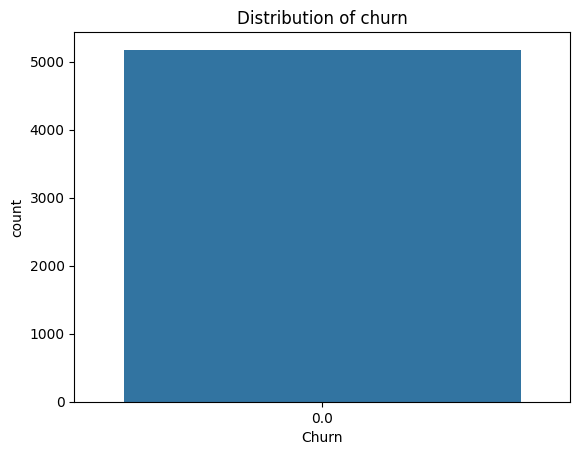

ValueError: could not convert string to float: '7590-VHVEG'

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Churn', data=data)
plt.title('Distribution of churn')
plt.show()
correlation_matrix = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.linear_model import LogisticRegression

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
0
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


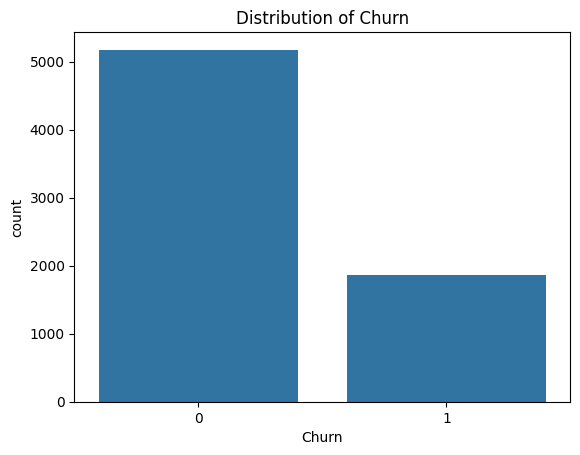

ValueError: could not convert string to float: '7590-VHVEG'

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('Telco_customer_churn_data1.csv')


data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())


print(data.isna().sum())


data = data.dropna(subset=['Churn'])


print(data['Churn'].isna().sum())


data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})


print(data['Churn'].head())


categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']


scaler = StandardScaler()


data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()


correlation_matrix = data.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)


log_reg_pred = log_reg.predict(X_test)
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)


def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc

log_reg_eval = evaluate_model(y_test, log_reg_pred)
rf_eval = evaluate_model(y_test, rf_pred)
gb_eval = evaluate_model(y_test, gb_pred)


print(f"Logistic Regression: {log_reg_eval}")
print(f"Random Forest: {rf_eval}")
print(f"Gradient Boosting: {gb_eval}")


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)


best_rf = grid_search.best_estimator_


best_rf_pred = best_rf.predict(X_test)
best_rf_eval = evaluate_model(y_test, best_rf_pred)

print(f"Best Random Forest: {best_rf_eval}")

C:\Users\Shubham\AppData\Local\Temp\ipykernel_3800\1932973405.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='coolwarm')


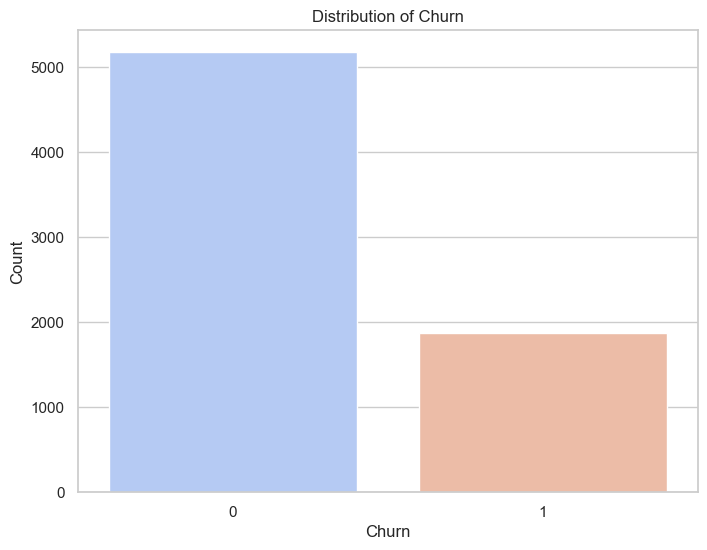

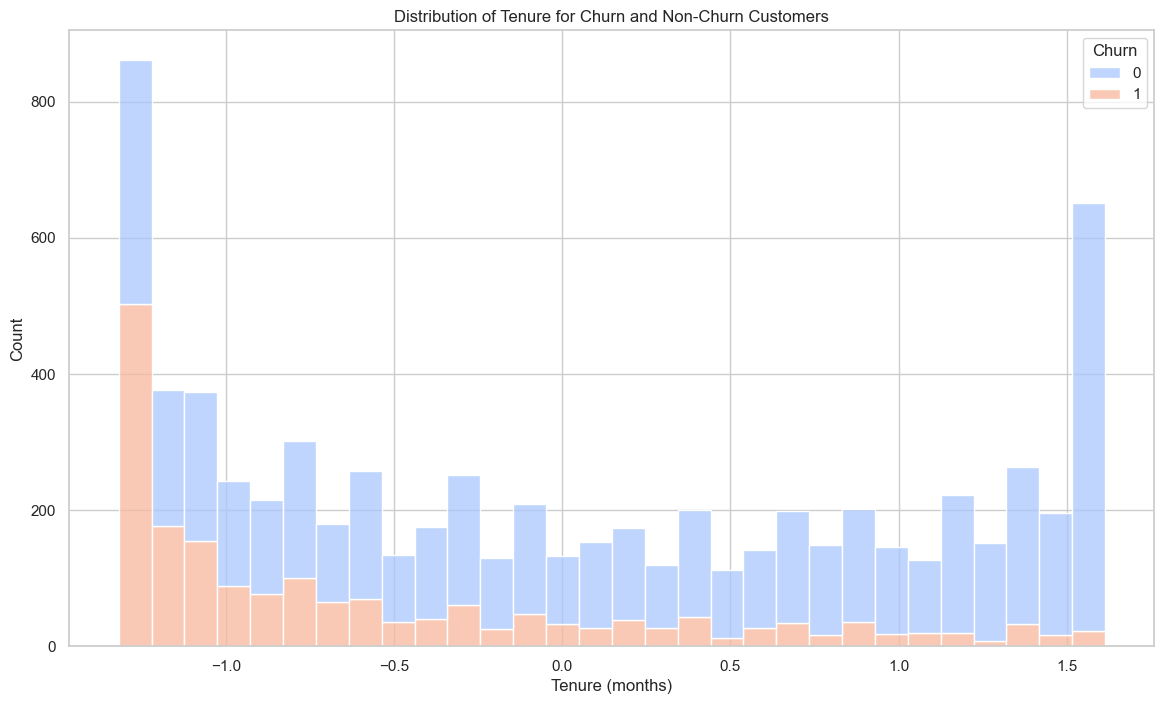

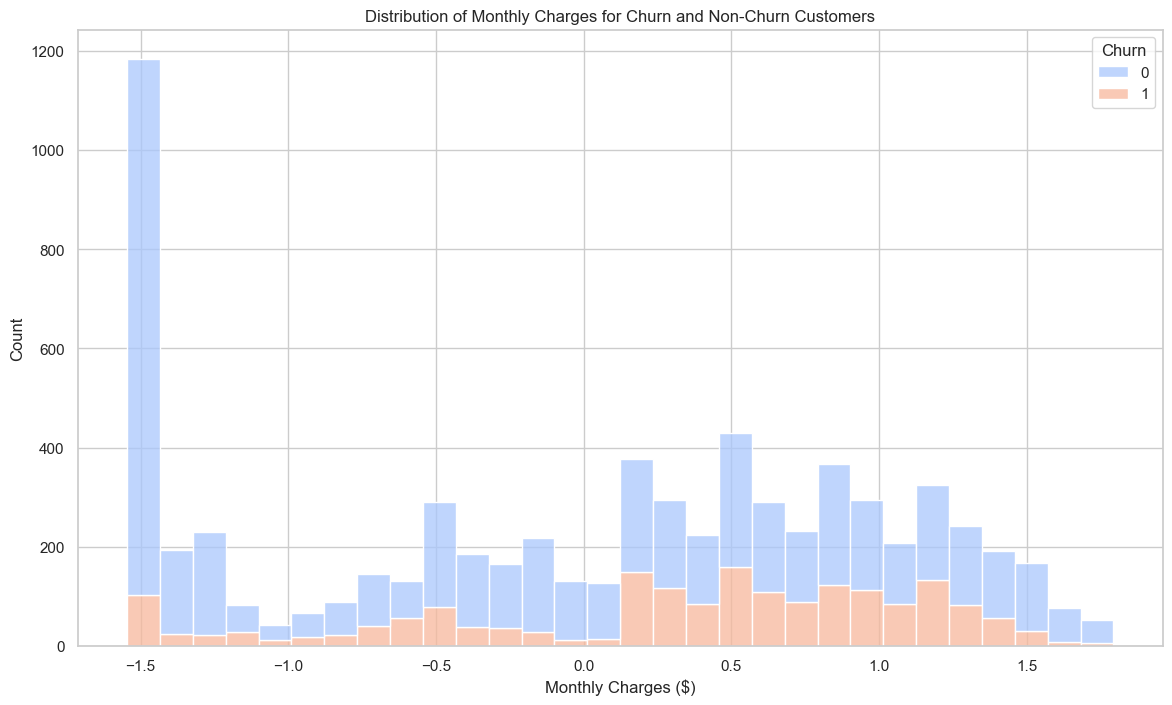

ValueError: could not convert string to float: '7590-VHVEG'

<Figure size 1600x1200 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid')


plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data, palette='coolwarm')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(14, 8))
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack', palette='coolwarm', bins=30)
plt.title('Distribution of Tenure for Churn and Non-Churn Customers')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(14, 8))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', multiple='stack', palette='coolwarm', bins=30)
plt.title('Distribution of Monthly Charges for Churn and Non-Churn Customers')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(16, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()